In [15]:
import requests
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt

In [16]:
apiKey = "2bf3b96d3b4bb02ecc8274a02e72f4b6238e5fec7588736e678265d0bd767caa"

In [17]:
url = "https://min-api.cryptocompare.com/data/top/mktcapfull"

In [18]:
headers = {'authorization': 'Apikey' + apiKey}

In [19]:
coin_count = 60

In [20]:
payload = {'limit': coin_count, 'tsym': 'USD'}
result = requests.get(url, headers = headers, params = payload).json()
data = pd.DataFrame(result['Data'])['CoinInfo']

In [21]:
coin_tickers = []
for index in range(coin_count):
    coin_tickers.append(data[index]['Name'])

In [22]:
url_hist = "https://min-api.cryptocompare.com/data/histoday"

In [23]:
tf = []
for i, item in enumerate(coin_tickers):
    
    try:
        
        payload = {'fsym': item, 'tsym': 'USD', 'limit': 365 * 3}
        result = requests.get(url_hist, headers = headers, params = payload).json()
        tf.append(pd.DataFrame(result['Data']))
        tf[i]['date'] = pd.to_datetime(tf[i]['time'], unit = 's')
        tf[i] = tf[i].set_index('date')
    
        tf[i]['volume'] = tf[i]['volumeto']
        tf[i] = tf[i].drop(['time', 'volumefrom', 'volumeto'], axis = 1)
        #tf.to_csv(r'C:\Users\leo_s\Documents\Git Projects\zipline_data\daily\\' + item + '.csv')
        tf[i].to_csv('/home/hao/Documents/trading_strats/data/daily/' + item + '.csv')
        
    except:
        
        continue

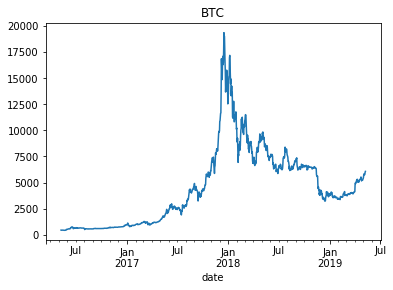

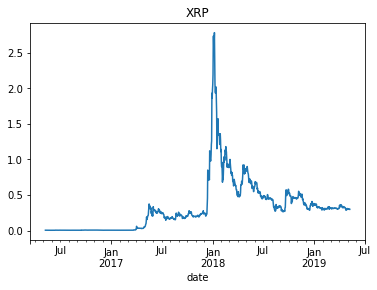

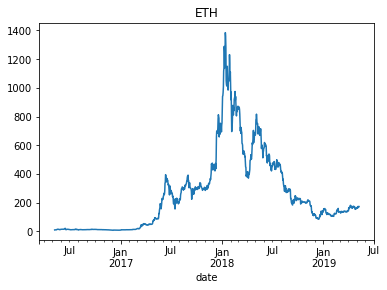

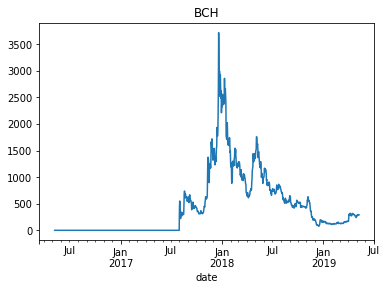

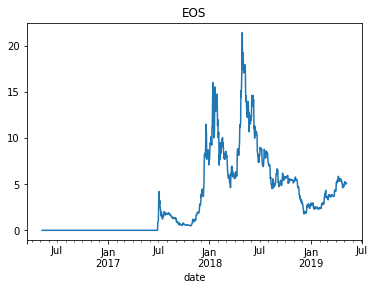

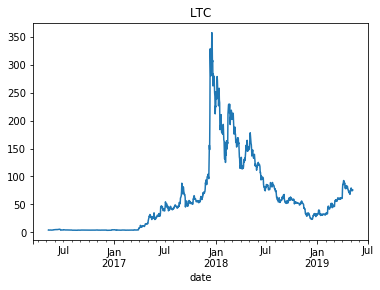

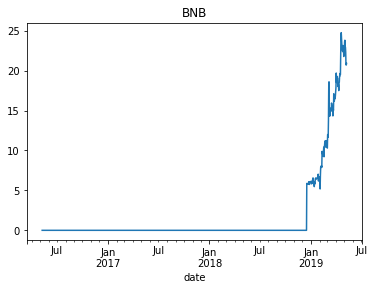

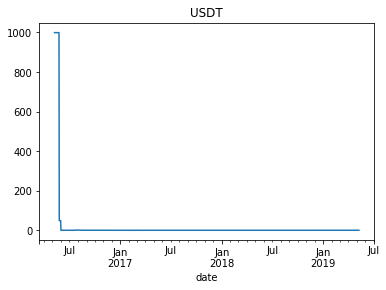

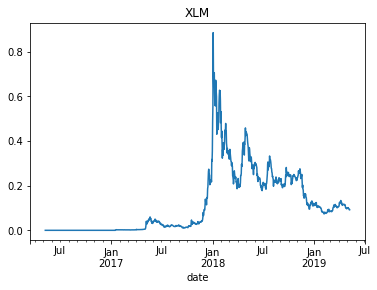

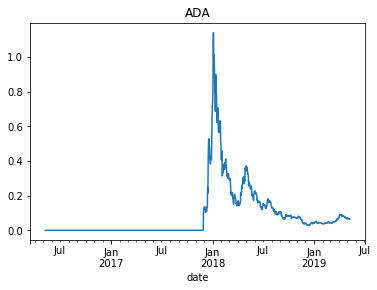

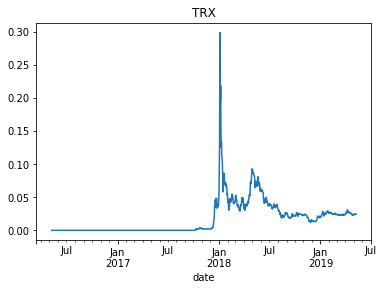

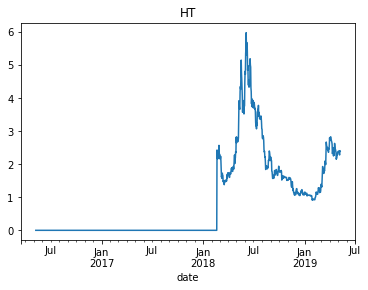

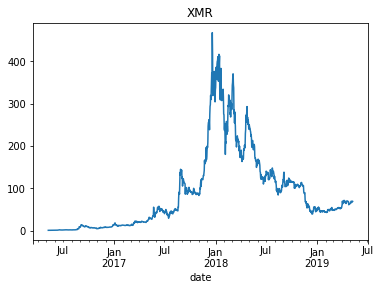

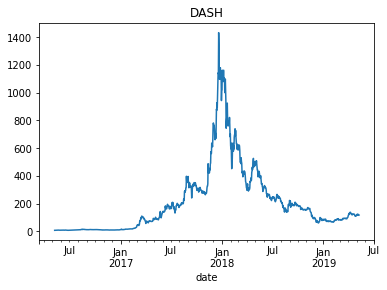

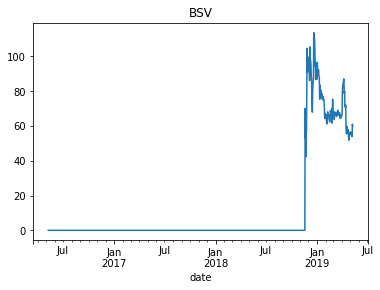

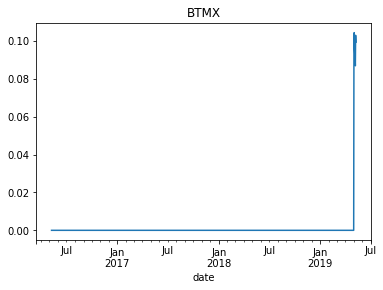

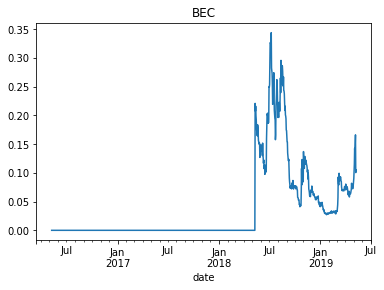

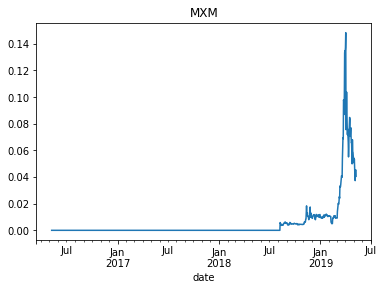

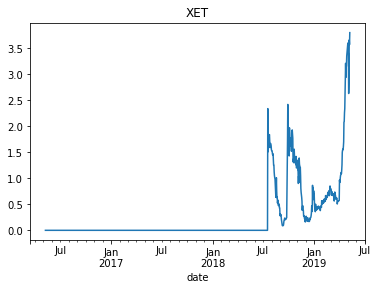

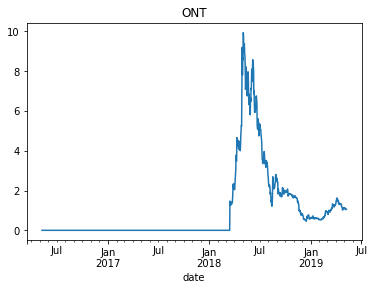

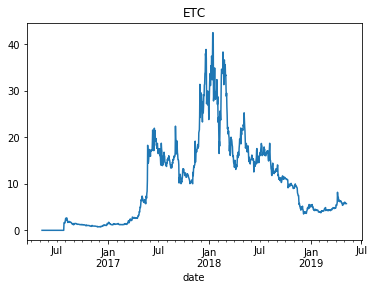

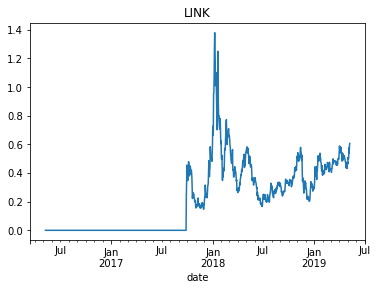

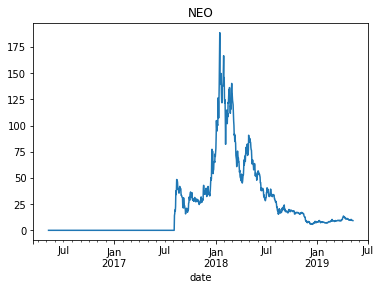

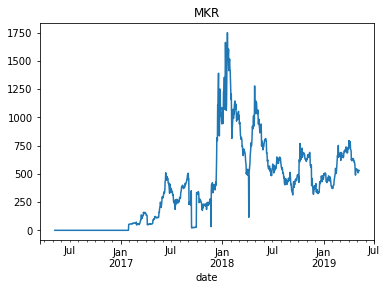

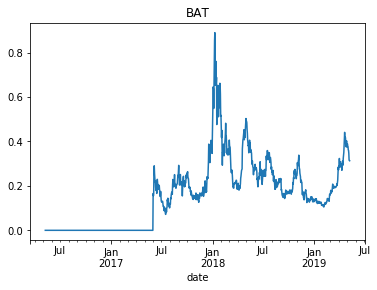

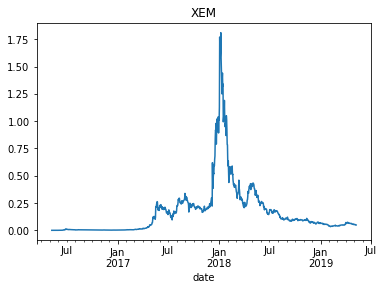

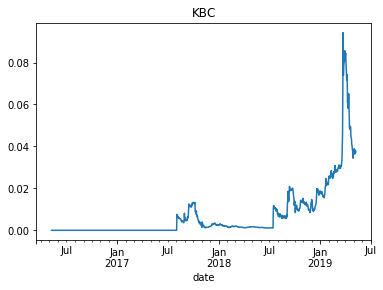

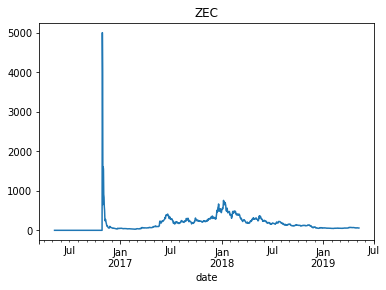

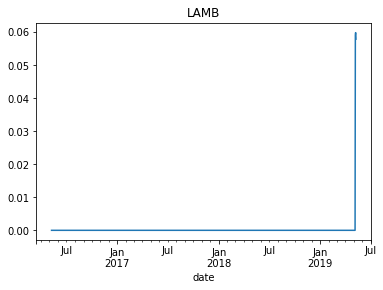

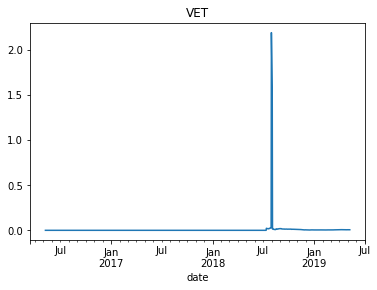

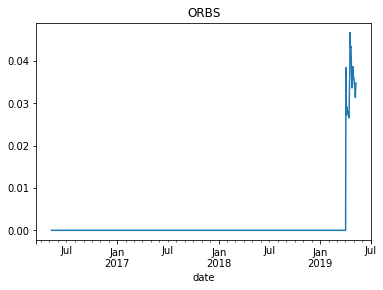

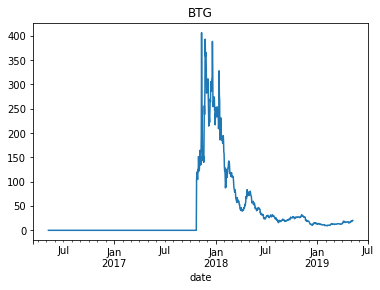

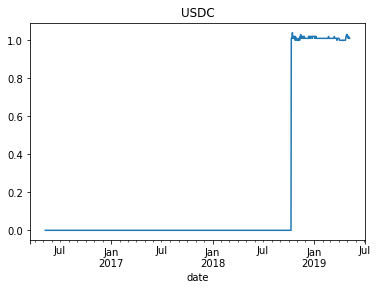

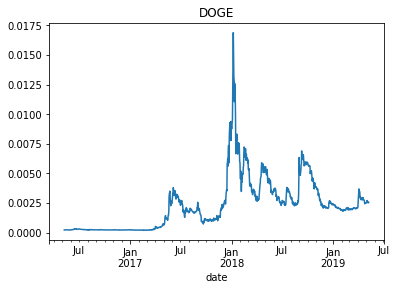

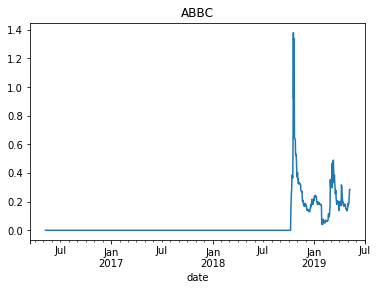

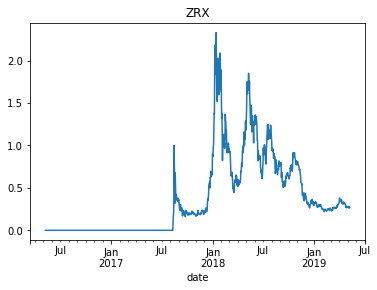

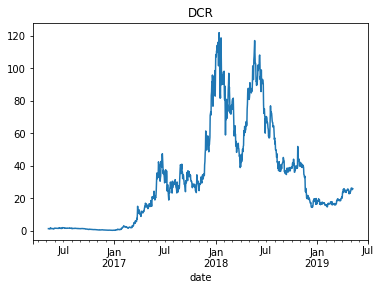

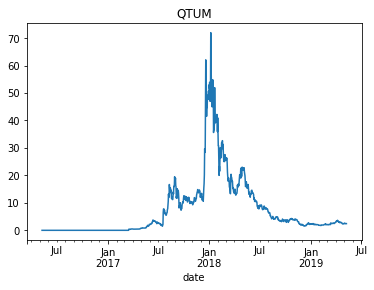

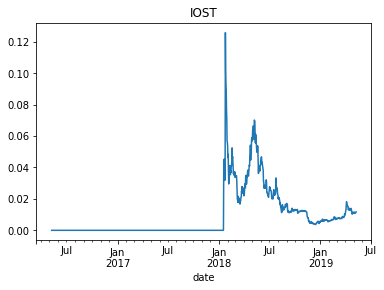

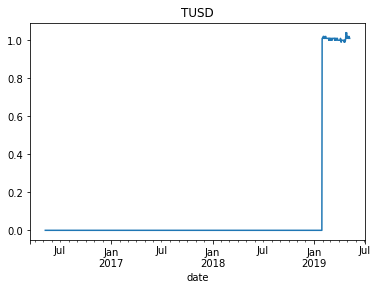

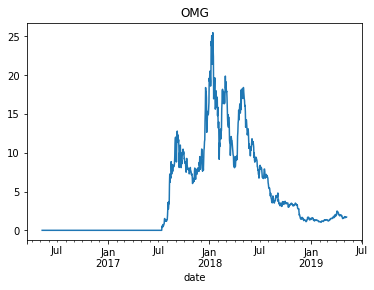

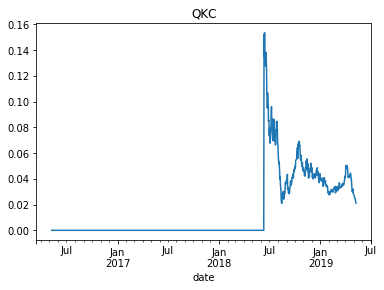

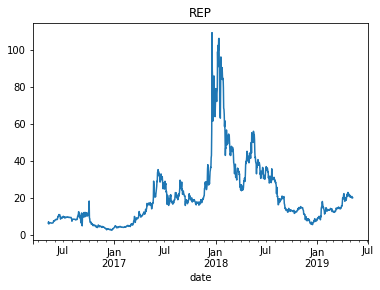

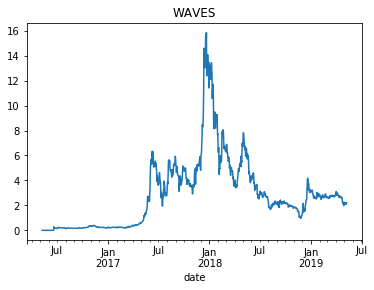

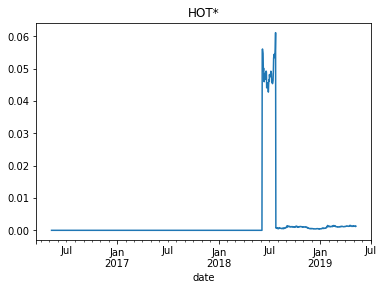

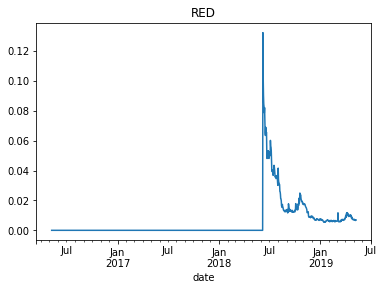

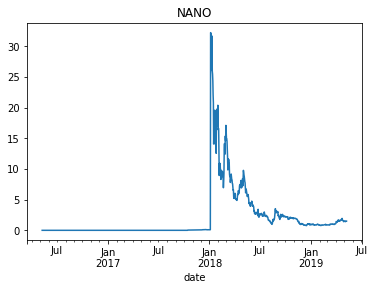

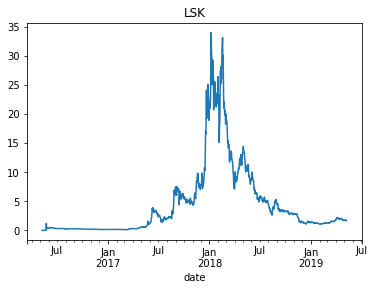

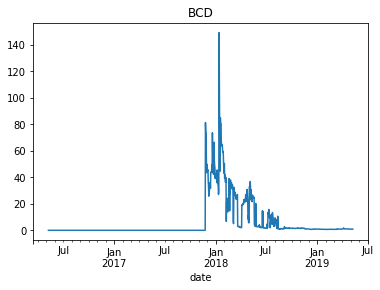

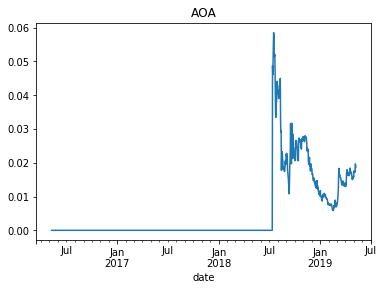

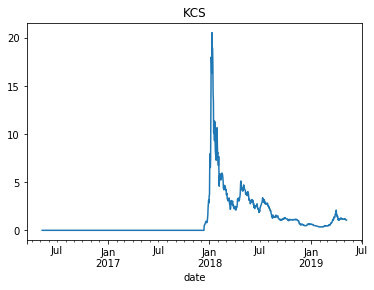

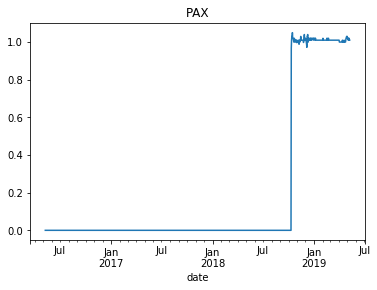

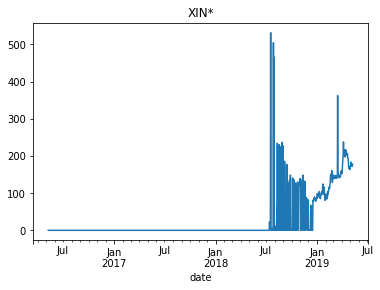

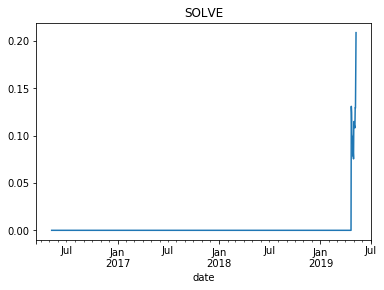

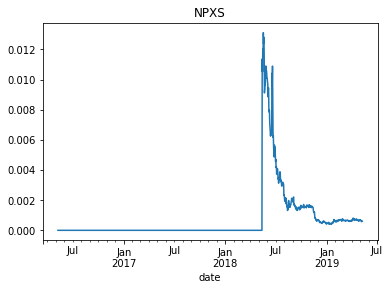

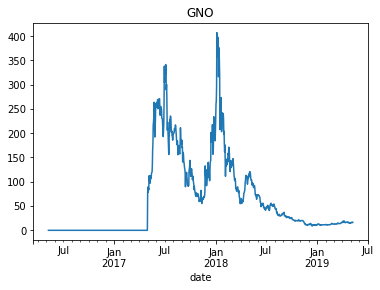

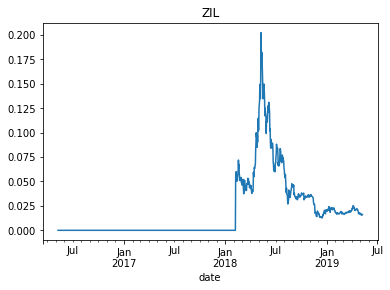

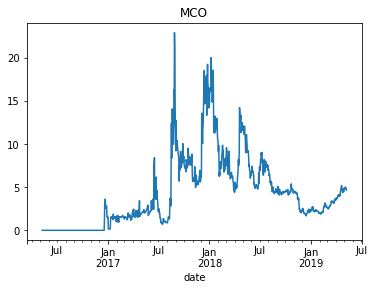

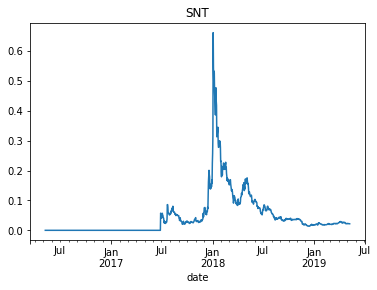

In [24]:
for i in range(len(tf)):
    try:
        tf[i]['close'].plot()
        plt.title(coin_tickers[i])
        plt.show()
    except:
        continue